In [503]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator


In [619]:
# import mc data file
# mcfile = 'mc_data/mc_data_roots100.npy'
# mcfile = '../dsa_mc/testing_pp.npy'

rs_arr = ['75', '85', '95', '105', '115', '125','135']
# mcfiles = [f'../dsa_mc/roots_{rs}_pp.npy' for rs in rs_arr]

mcfiles = ['../dsa_mc/roots_75/roots_75_100k.npy']
# mcfiles = ['../dsa_mc/roots_75/data/mc_data_0.npy']

columns = ['s', 'Q', 'x', 'delta', 'pT', 'z', 'y', 'phi_kp', 'phi_Dp', 
                                      'num_dsa', 'den_dsa', '<1>', '<cos(phi_kp)>', '<cos(phi_Dp)>', 
                                     '<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>']



mc_df = {}
for ifile, mcfile in enumerate(mcfiles):
    mcdata = np.load(mcfile)
    mc_df[rs_arr[ifile]] = pd.DataFrame(mcdata, columns=columns)
    mc_df[rs_arr[ifile]]['t'] = np.abs(mc_df[rs_arr[ifile]]['delta'])**2



In [621]:
mc_df['75'].tail()

,s,Q,x,delta,pT,z,y,phi_kp,phi_Dp,num_dsa,den_dsa,<1>,<cos(phi_kp)>,<cos(phi_Dp)>,<cos(phi_Dp)cos(phi_kp)>,<sin(phi_Dp)sin(phi_kp)>,t
99995,5625.0,6.387358,0.009078,0.133244,12.808461,0.312991,0.799006,1.109640,1.192953,4.077166,9.930365,0.399601,-0.057450,0.006885,-0.001334,0.000304,0.017754
99996,5625.0,4.656216,0.008141,0.125253,12.156430,0.703664,0.473460,1.449072,2.323868,8.940527,14.644690,0.337438,0.073049,-0.008276,-0.002296,0.000279,0.015688
99997,5625.0,5.358221,0.006474,0.178123,5.162707,0.734592,0.788364,2.751925,2.599613,322.707283,2143.225574,0.187016,0.007003,-0.003221,0.000623,-0.000102,0.031728
99998,5625.0,4.049097,0.007343,0.149584,10.588336,0.448630,0.396950,0.971438,1.314683,19.138175,60.496008,0.268230,-0.012866,0.001544,-0.001125,-0.000019,0.022375
99999,5625.0,5.544464,0.008633,0.145949,12.823000,0.270580,0.633082,5.297049,0.966379,4.226037,13.728299,0.362745,-0.087936,0.009915,-0.002583,0.000419,0.021301


In [623]:
# function to plot histograms

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

labels = {
         'num_dsa': 'DSA',
         'den_dsa': 'Total',
         '<1>': r'$A_{LL}$',
         '<cos(phi_kp)>': r'$\langle \cos(\phi_{kp}) \rangle$',
         '<cos(phi_Dp)>': r'$\langle \cos(\phi_{\Delta p}) \rangle$',
         '<cos(phi_Dp)cos(phi_kp)>': r'$\langle \cos(\phi_{kp}) \cos(\phi_{\Delta p}) \rangle$',
         '<sin(phi_Dp)sin(phi_kp)>': r'$\langle \sin(\phi_{kp}) \sin(\phi_{\Delta p}) \rangle$'
         }

def plot_histogram(datasets, df, weights, constraints={}, **options):

    asp_ratio = 4/3
    psize = 5

    fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))
        
    colors = ['black', 'red', 'blue', 'green', 'gray', 'orange']
    linestyles = ['-', '--', '-.', '-', '-', '-']

    lumi = options.get('lumi', 10) # total integrated luminosity in fb^-1
    lumi *= options.get('efficiency', 1) # correct for detector efficiency

    for idata, data in enumerate(datasets):
        for iw, weight in enumerate(weights): 

            no_label = False
            if len(datasets) > 1:
                if len(weights) > 1: raise ValueError('Should not plot multiple weights with multiple datasets')
                label = options.get('labels')[idata]
                ilab = idata
            
            elif len(weights) > 1:
                label = options.get('labels')[iw]
                ilab = iw
                    
            else:
                ilab = 0
                label = None

            # make data plot
            if options.get('rel_error'):
                ax.step(data[weight]['bin_centers'], data[weight]['rel_errors'], where='mid', linestyle=linestyles[ilab], color=colors[ilab], linewidth=1, label=label)
                ax.scatter(data[weight]['bin_centers'], data[weight]['rel_errors'], linestyle=linestyles[ilab], color=colors[ilab], linewidth=1)
            else:
                ax.errorbar(
                    data[weight]['bin_centers'], data[weight]['plot_counts'], yerr=data[weight]['total_errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.0, color=colors[ilab],
                    label=label
                )
    
                ax.step(data[weight]['bin_centers'], data[weight]['plot_counts'], where='mid', linestyle=linestyles[ilab], color=colors[ilab], linewidth=1)
    
        if len(weights) > 1 or len(datasets) > 1: ax.legend(frameon=False)

        # make info box for kinematics
        info_text = fr'Integrated luminosity: ${lumi}\,\, \mathrm{{fb}}^{{-1}}$'
        if options.get('roots_label'):
            info_text += '\n' + fr'$\sqrt{{s}} = {round(np.sqrt(df.iloc[0]['s']))}\,\, \mathrm{{GeV}}$'
        else: 
            pass
        # info_text += '\nCuts:'

        for var in ['Q', 'x', 't', 'z']:
            low = df[var].min()
            high = df[var].max()
            
            if var == 'Q':
                info_text += '\n'+ fr'${var}^2 \, \in \,[{round(low**2,1)}, \, {round(high**2,1)}]\, \mathrm{{GeV^2}}$'
            elif var == 't':
                info_text += '\n'+ fr'${var} \, \in \,  [{round(low,2)}, \, {round(high,2)}]\, \mathrm{{GeV}}^2$'
            elif var == 'x':
                info_text += '\n'+ fr'${var} \, \in \, [{round(low,3)}, \, {round(high,3)}]$'
            elif var == 'z':
                info_text += '\n' + fr'${var} \, \in \, [{round(low,2)}, \, {round(high,2)}]$'

        if options.get('info_box'):
            if options.get('rel_error'):
                ax.text(
                    0.6, 0.05, info_text, 
                    transform=ax.transAxes,  
                    ha='left', va='bottom', 
                    fontsize=11, wrap=True, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.3, edgecolor='none')
                )
            else:
                ax.text(
                    0.05, 0.05, info_text, 
                    transform=ax.transAxes, 
                    ha='left', va='bottom', 
                    fontsize=11, wrap=True, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.3, edgecolor='none')
                )

        # set plot info
        if options.get('y_limits'): ax.set_ylim(options.get('y_limits'))
        # ax.set_xlim(options.get('x_limits', [plot_bins[0], plot_bins[-1]]))
        ax.set_title(options.get('title', ''))
        ax.set_ylabel(options.get('y_label', ''), loc='top')
        ax.set_xlabel(options.get('x_label', ''), loc='right')
        ax.set_yscale(options.get('y_scale', 'linear'))
        ax.set_xscale(options.get('x_scale', 'linear'))
        # ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        ax.tick_params(which='both', direction="in", length=5, width=1)
        ax.grid(options.get('grid', False)) 
        ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
        if options.get('zero_line', False): ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
        if options.get('one_line', False): ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)
        if options.get('min_pT_line', False) and plot_var == 'pT': 
            ax.axvline(x=1, color='gray', linestyle='--')
            ax.fill_betweenx(ax.get_ylim(), ax.get_xlim()[0], 1, color='gray', alpha=0.25)
        plt.tight_layout()
        if options.get('saveas'): 
            if 'DNS' in options.get('saveas'): 
                pass
            else:
                fig.savefig(options.get('saveas'), dpi=400, bbox_inches="tight")



def cut_data(df, var, weights, constraints={}, **options):

    lumi = options.get('lumi', 10) # total integrated luminosity in fb^-1
    lumi *= options.get('efficiency', 1) # correct for detector efficiency
        
    # get bins
    bins = options.get('bins')
    nbins = len(bins)
    bin_width = bins[1] - bins[0]

    # enforce constraints
    mask = pd.Series(True, index=df.index)
    for ivar, (low, high) in constraints.items(): mask &= df[ivar].between(low, high)
    fixed_df = df[mask]

    if fixed_df.empty:
        print('Error: cut data is empty - constraints are too strict')
        return

    for iw in weights: assert iw in list(df.columns), f'Error: option for weight {iw} not recognized'

    cut_data = {}
    # make plot data       
    for iw, weight in enumerate(weights):

        total_counts, plot_bins = np.histogram(fixed_df[var], bins=bins, weights=fixed_df['den_dsa'])
        plot_counts, _ = np.histogram(fixed_df[var], bins=bins, weights=fixed_df[weight])

        print(plot_counts)
        bin_centers = 0.5*(plot_bins[:-1]+plot_bins[1:])

        # ensure bins are properly averaged
        n_entries, _ = np.histogram(fixed_df[var], bins=bins)
        # plot_counts = np.array([icount/(bin_width*ientry) if ientry != 0 else 0 for icount, ientry in zip(plot_counts, n_entries)])
        plot_counts = np.array([icount/(bin_width*ientry) if ientry != 0 else 0 for icount, ientry in zip(plot_counts, n_entries)])
        total_counts = np.array([icount/(bin_width*ientry) if ientry != 0 else 0 for icount, ientry in zip(total_counts, n_entries)])
        
        # errors are calculated for a given integrated luminosity (5% systematic error added per 1505.05783)
        if '<' in weight:
            stat_errors = np.array([np.sqrt((1+ic)/(lumi*tc)) if tc != 0 else 0 for ic, tc in zip(plot_counts, total_counts)])
        else:
            stat_errors = np.sqrt(total_counts/lumi)
        sys_errors = 0.05*np.abs(plot_counts)  
        total_errors = np.sqrt((stat_errors**2)+(sys_errors)**2)
        rel_errors = [ierror/np.abs(icount) if icount != 0 else 0 for icount, ierror in zip(plot_counts, total_errors)]

        cut_data[weight] = {}
        cut_data[weight]['bin_centers'] = bin_centers
        cut_data[weight]['plot_counts'] = plot_counts
        cut_data[weight]['total_errors'] = total_errors
        cut_data[weight]['rel_errors'] = rel_errors

    return cut_data, fixed_df



[ 0.          0.          0.          0.          0.          0.57841149
  0.80298993  0.78841406  0.34609398  0.38210533  0.36756247  0.28584119
  0.27597319  0.26808715  0.23852265  0.10345248 -0.0266665  -0.02862798
 -0.21720243 -0.28093077 -0.24102683 -0.34497704 -0.49478246 -0.40863337
 -0.57270882 -0.61827572 -0.68586165 -0.64593457 -0.74046035 -0.82816708
 -0.87180951 -0.94723552 -0.95313424 -0.92901059 -1.09582308 -1.04975542
 -0.92213639 -1.03056846 -1.0095218  -1.31769658 -1.39108356 -1.22017784
 -0.93916098 -1.02812783 -1.02204026 -1.05100568 -1.1946773  -1.56320704
 -1.28484925 -1.25955088 -1.5690073  -1.51177245 -0.8591752  -1.24166602
 -0.75326363 -0.66669937 -1.06477382 -0.9196309  -1.13620174 -0.95217878
 -1.066454   -0.99845843 -0.83833851 -0.67322765 -0.97957945 -0.83545359
 -0.89795178 -0.77702403 -0.84639104 -0.72786837 -0.91668547 -0.48835277
 -0.2790969  -0.19320966 -0.43214433 -0.54354015 -0.57430204 -0.91056199
 -0.53283999]


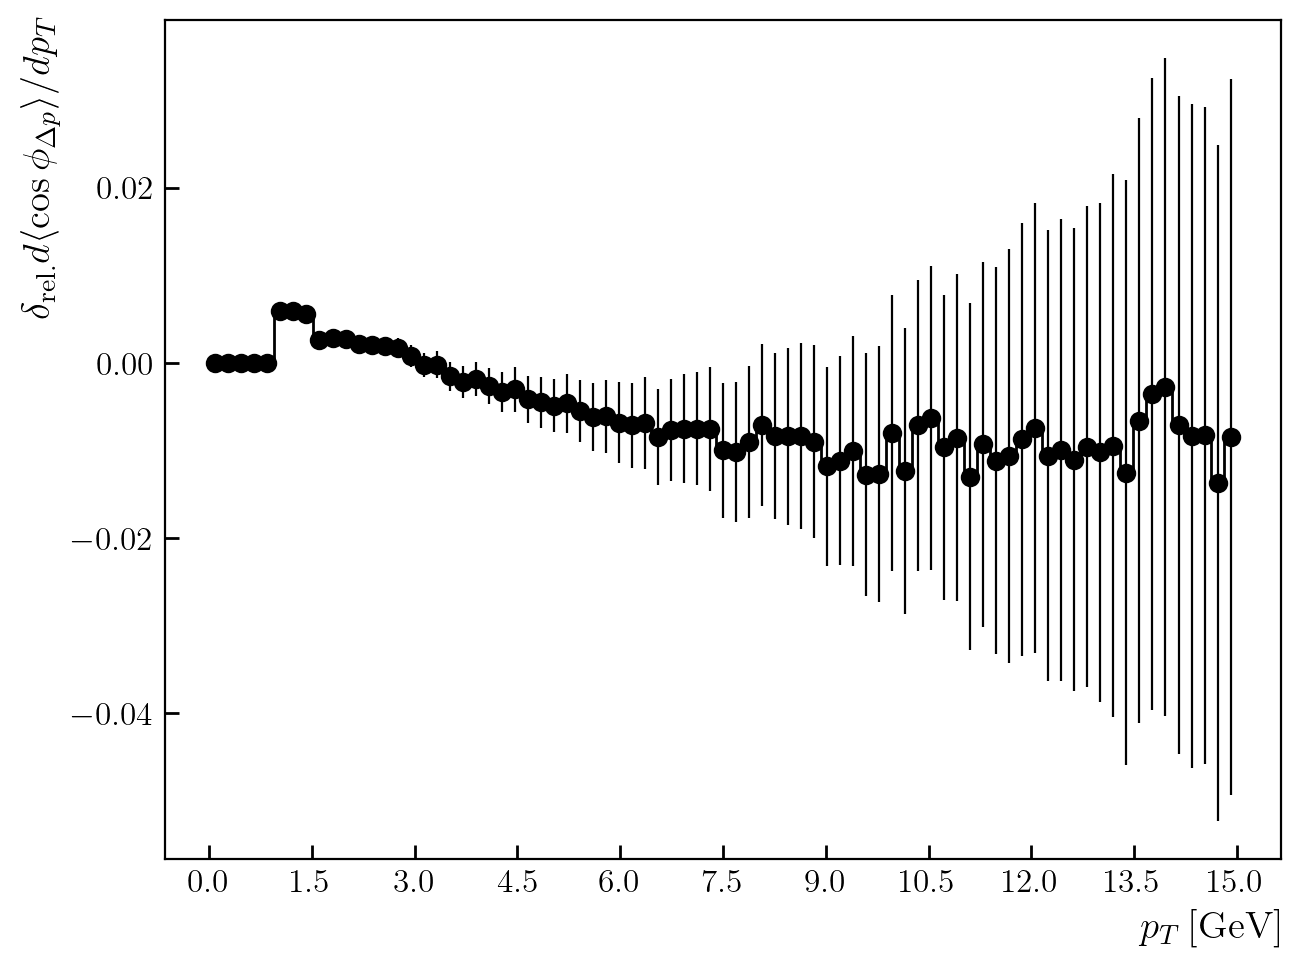

In [627]:
# plot relevant quantities 

Q_bins = np.linspace(6, 10.0, num=35)
pT_bins = np.linspace(0, 15.0, num=80)
phi_bins = [i/(2*np.pi) for i in range(15)]

lumi = 10
Q_min = 4.0 
Q_max = 9.5
y_min = 0.4
y_max = 0.5
z_min = 0.2
z_max = 0.5
x_min = 0.00001
x_max = 0.01

tag = 'DNS'


# labels = [r'$d \langle \cos \phi_{kp} \, \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
#           r'$\delta_{\mathrm{rel.}} d \langle  \cos \phi_{\Delta p} \rangle /dp_T $']

cuts = {
        # 'Q': [Q_min, Q_max],
        # 'pT': [2.5, 3.5]
        # 'y': [y_min, y_max],
        'z': [z_min, z_max],
        # 'x': [x_min, x_max],
        }
cdata = []
labels = []
for irs, rs in enumerate(rs_arr): 
    # if rs in ['85', '105', '125']: continue
    if rs != '75': continue

    labels.append(rf'$\sqrt{{s}} = {rs} \, \mathrm{{GeV}}$')
    
    tdata, cdf = cut_data(mc_df[rs], 'pT', ['<cos(phi_Dp)>'], cuts, bins=pT_bins)
    cdata.append(tdata)

plot_histogram(cdata, cdf, ['<cos(phi_Dp)>'], 
               lumi = lumi,
               labels = labels,
               efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = pT_bins,
               # y_limits = [0.01, 100],
               # one_line = True,
                # rel_error=True,
               info_box = False,
               # min_pT_line = True,
               # y_label=r'$d \langle  \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
               y_label=r'$\delta_{\mathrm{rel.}} d \langle  \cos \phi_{\Delta p} \rangle /dp_T $',
               x_label=r'$p_T\, [\mathrm{GeV}]$',
               saveas = f'plots/cos_{tag}.pdf'
              )



